### Importarea librariilor

In [15]:
import random
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Definirea clasei 'Customer'
O clasă ce are drept atribute timpul sosirii, timpul intrării în serviciu, timpul de servire, timpul plecării, cât și timpul de așteptare la coadă

In [16]:
class Customer:
    def __init__(self, arrival_time, service_start_time, service_time):
        self.arrival_time = arrival_time
        self.service_start_time = service_start_time
        self.service_time = service_time
        self.service_end_time = self.service_start_time + self.service_time
        self.wait = self.service_start_time - self.arrival_time

### Definirea funcției exp(lambd)
Metoda expovariate definește o distribuție exponențială. **lambd** este 1.0/media_dorită.

In [17]:
def generate_exponential(lambd):
    return random.expovariate(lambd)

### Definirea unei funcții de simulare a modelului de asteptare M/M/1

In [18]:
def simulation(lambd, mu, end_time):
    
    # Intensitatea traficului
    rho = lambd/mu
    
    # Initializam timpul t = 0 (timpul de incepere)
    t = 0
    
    # Cream o lista cu evidenta fiecarui client intrat in sistem
    Customers = []
    
    while t < end_time:
        
        # Calculam timpul de sosire si servire pentru primul client
        
        if len(Customers) == 0:
            arrival_time = generate_exponential(lambd)
            queue = 0
            # servirea incepe de indata ce clientul ajunge in sistem
            service_start_time = arrival_time  
        else:
            # proprietatea "fara memorie"
            arrival_time += generate_exponential(lambd)
            service_start_time = max(arrival_time, Customers[-1].service_end_time)
            # max(timpul sosirii urmatorului client, timpul plecarii ultimului client)
        service_time = generate_exponential(mu)
        
        
        # Cream un nou client (unitate)
        Customers.append(Customer(arrival_time, service_start_time, service_time))
        
        # Incrementam timpul
        t = arrival_time
        
#----------------------------------

    # Timpii de asteptare la coada (Wq) pentru fiecare client 
    waiting_queue_times = [a.wait for a in Customers]
    mean_waiting_queue = sum(waiting_queue_times) / len(waiting_queue_times)
    mean_wq_formula = rho / (mu - lambd)
    
    # Timpii totali de asteptare (W) pentru fiecare client
    total_waiting_times = [a.wait + a.service_time for a in Customers]
    mean_waiting_time = sum(total_waiting_times) / len(total_waiting_times)
    mean_w_formula = 1 / (mu - lambd)
    
    # Timpii de servire pentru fiecare client
    service_times = [a.service_time for a in Customers]
    mean_service_time = sum(service_times)/len(service_times)
    
    # Intensitatea traficului
    rho_sim = sum(service_times) / t
    
    # Timpul total in care statia a fost libera
    total_service_time = sum(service_times)
    server_idle_time = end_time - total_service_time
    
    
    # Calculam statisticile vizate 
    
    statistici = {'Nr. Clienti in sistem': len(Customers),
            'Timp mediu de servire': mean_service_time,
            'Timp mediu de servire (1/mu)': 1/mu,
            'Timp mediu de asteptare la coada': mean_waiting_queue,
            'Timp mediu de asteptare la coada (cu formula)': mean_wq_formula,
            'Timp mediu total de asteptare': mean_waiting_time,
            'Timp mediu de asteptare (cu formula)': mean_w_formula,
            'Intensitatea traficului (timpii de servire contra timp)': rho_sim,
            'Intensitatea traficului (cu formula lambda / mu)': rho,
            'Timpul total in care statia de servire a fost libera':\
            str(datetime.timedelta(hours=server_idle_time)).rsplit(':', 1)[0],
            'Proportia in care statia a fost libera':server_idle_time / end_time}
    
    table_statistici = pd.DataFrame(statistici, index=[0])
    display(table_statistici)
    
    arrivaltime = []
    waittime = []
    servtime = []
    deptime = []
    
    for c in Customers:
        arrivaltime.append(\
            float(str\
        (datetime.timedelta(hours=c.arrival_time)).rsplit(':', 1)[0].replace(":",".")))
        waittime.append(\
            float(str\
        (datetime.timedelta(hours=c.wait)).rsplit(':', 1)[0].replace(":",".")))
        servtime.append(\
            float(str\
        (datetime.timedelta(hours=c.service_time)).rsplit(':',1)[0].replace(":",".")))
        deptime.append(\
            float(str\
        (datetime.timedelta(hours=c.service_end_time)).rsplit(':', 1)[0].replace(":",".")))
        
    data = {'Ajunge la ora: ': arrivaltime,
                'Asteapta timp de: ': waittime,
            'Este servit timp de: ': servtime,
                'Pleaca la ora: ': deptime}
    
    df = pd.DataFrame(data)
    df.index = df.index + 1
    df.index.name = "Nr. Client"
    display(df)
    
    ID = [a + 1 for a in range(len(Customers))]
    
    # Suntem interesati si de vizualizarea acestor date
    plt.figure(1)
    plt.figure(figsize = (14,10))
    plt.plot(ID, waittime, label = 'Timpul de asteptare la coada')
    plt.plot(ID, waittime, 'C0o', alpha=0.5)
    plt.xlabel("Clientul (i)")
    plt.ylabel("Timpul de asteptare la coada")
    plt.xticks(np.arange(1, len(Customers) + 5, 15))
    plt.yticks(np.arange(0.00, max(waittime) + 0.05, 0.05))
    plt.title("Grafic cu timpul de asteptare la coada al fiecarui client")
    plt.legend(title='Legenda:')
    
    plt.figure(2)
    plt.figure(figsize = (14,10))
    plt.plot(ID, servtime, 'r', label = 'Timpul de servire')
    plt.plot(ID, servtime, 'ro', alpha=0.5)
    plt.xlabel("Clientul (i)")
    plt.ylabel("Timpul de servire")
    plt.title("Grafic cu timpul de servire asociat fiecarui client")
    plt.xticks(np.arange(1, len(Customers) + 5, 15))
    plt.yticks(np.arange(0.0, max(servtime) + 0.05, 0.05))
    plt.legend(title='Legenda:')
    plt.show()
    
    

,Nr. Clienti in sistem,Timp mediu de servire,Timp mediu de servire (1/mu),Timp mediu de asteptare la coada,Timp mediu de asteptare la coada (cu formula),Timp mediu total de asteptare,Timp mediu de asteptare (cu formula),Intensitatea traficului (timpii de servire contra timp),Intensitatea traficului (cu formula lambda / mu),Timpul total in care statia de servire a fost libera,Proportia in care statia a fost libera
0,223,0.066321,0.066667,0.115806,0.133333,0.182128,0.2,0.704008,0.666667,6:12,0.295729


,Ajunge la ora:,Asteapta timp de:,Este servit timp de:,Pleaca la ora:
Nr. Client,,,,
1,0.05,0.00,0.04,0.09
2,0.09,0.00,0.05,0.15
3,0.16,0.00,0.05,0.21
4,0.16,0.04,0.01,0.22
5,0.23,0.00,0.07,0.30
6,0.25,0.04,0.02,0.33
7,0.26,0.06,0.01,0.34
8,0.40,0.00,0.00,0.41
9,0.41,0.00,0.01,0.43


<Figure size 432x288 with 0 Axes>

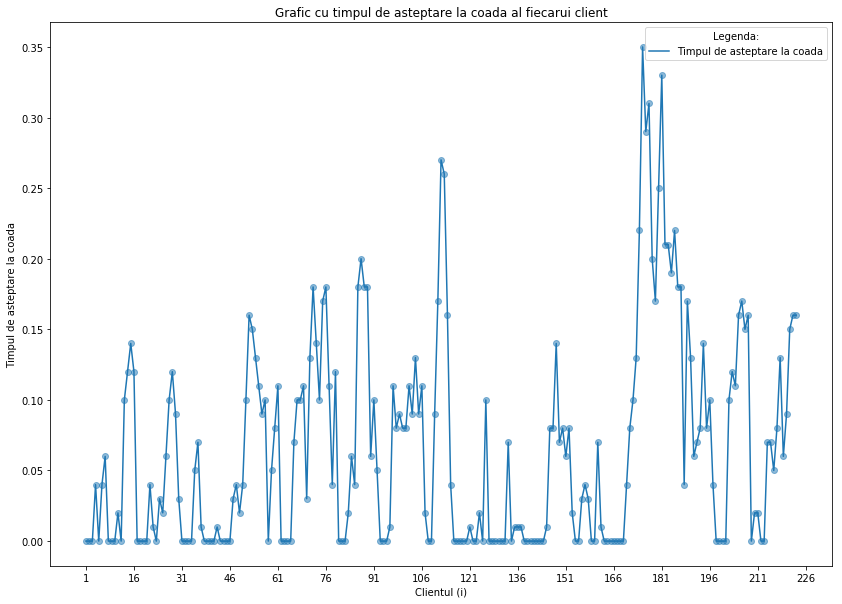

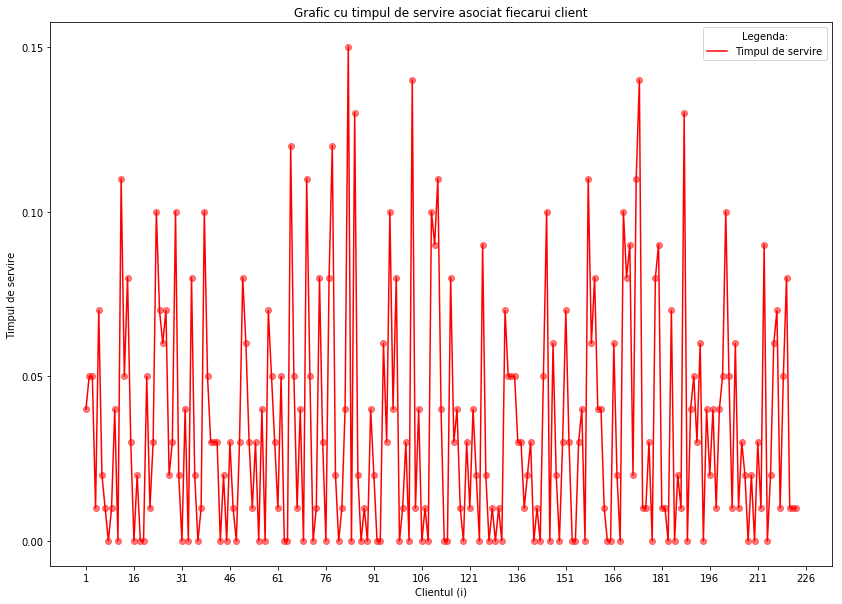

In [49]:
simulation(10,15,21)